The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[   25  2800  5575  8350 11125 13900 16675 19450 22225 25000]
25
Run:  0


C:\Users\jarvi\amp_qgt.ipynb:212: RuntimeWarning: divide by zero encountered in double_scalars
  "            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)\n",
C:\Users\jarvi\amp_qgt.ipynb:212: RuntimeWarning: invalid value encountered in double_scalars
  "            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)\n",


Run:  25
Run:  50
Run:  75
2800
Run:  0
Run:  25
Run:  50
Run:  75
5575
Run:  0
Run:  25
Run:  50
Run:  75
8350
Run:  0
Run:  25
Run:  50
Run:  75
11125
Run:  0
Run:  25
Run:  50
Run:  75
13900
Run:  0
Run:  25
Run:  50
Run:  75
16675
Run:  0
Run:  25
Run:  50
Run:  75
19450
Run:  0
Run:  25
Run:  50
Run:  75
22225
Run:  0
Run:  25
Run:  50
Run:  75
25000
Run:  0
Run:  25
Run:  50
Run:  75


Text(0.5, 0, 'Number of items')

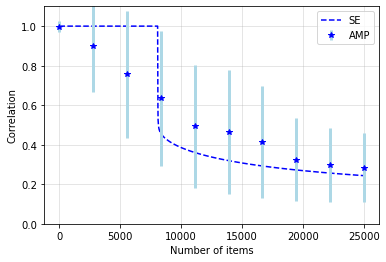

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Made for the Sublinear QGT problem by: Järvi Raes
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from ipynb.fs.full.amp_qgt import sub_amp_bayes, amp_bayes, create_beta, Xiid_to_Xtilde, y_iid_to_y_iid_tilde
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub
from numpy.random import binomial

# defective chance
theta = 0.5

noise = 0

run_no = 100

p_array = []
p_array = np.round(np.linspace(25, 25000, num=10)).astype(int)
print(p_array)
se_p_array = np.round((np.linspace(25, 25000, num=2000))).astype(int)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for p in p_array:
    print(p)
    #theoretical information limit
    ITL1 = 2*(1-theta)/theta*p**theta
    #Theoretical information limit of Hahn2025
    ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
    #defective chance
    nu = p**(theta-1)
    #delta
    delta = 2.25*ITL1/(nu*p)
    #print("Delta: ", delta)
    #number of tests
    n = int(delta*nu*p)
    #print(ITL, n)
    
    mse_runs = []
    nc_runs = []
    
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
    
        t = 100
        #chance of inclusion in a test
        alpha = 0.5
        if(run % 25 ==0):
            print("Run: ", run)
            
        X = binomial(1, alpha, (n,p))
        y = np.dot(X, beta_0)
        
        #AMP
        X_tilde = Xiid_to_Xtilde(X, alpha)
        
        defect_no = np.sum(beta_0)
        
        y_tilde = y_iid_to_y_iid_tilde(y, alpha, nu, n, p, defect_no)
        X_tilde_T = np.transpose(X_tilde)
        beta, mse_pred, tau_array, error_norm_array, nc_array = sub_amp_bayes(X_tilde, X_tilde_T, y_tilde, t, nu, beta_0, theta, delta)
        if np.linalg.norm(beta_0)==0:
            norm_correl = 1 
        else: 
            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)

        nc_runs.append(norm_correl)
        

    nc_array_av.append(np.average(nc_runs))
    nc_array_std.append(np.std(nc_runs))
    
for p in se_p_array:
    nu = p**(theta-1)
    delta = 2.25*ITL1/(nu*p)
    #theoretical information limit
    ITL1 = 2*(1-theta)/theta*p**theta
    #Theoretical information limit of Hahn2025
    ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(delta, t, nu, p,  theta)
    se_nc_array.append(nc_pred)
    
    
plt.figure()
plt.ylim(0, 1.1)
plt.plot(se_p_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(p_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel('Number of items')

